<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml20_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(Recurrent Neural Netowrk, 순환 신경망)

시계열 데이터, 텍스트 데이터와 같이 순서가 중요한 데이터(순차 데이터, sequence)를 다룰 때 많이 사용하는 신경망.

# Imports

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

# 단어 수준 one-hot encoding

## 단어-인덱스 매핑

In [2]:
sentence = 'The cat sat on the table.'

In [5]:
word_index = {}  # 단어를 키로 하고, 숫자를 값(value)로 저장할 dict
for word in sentence.split():  # 하나의 문장 공백으로 구분된 단어 리스트에서 반복하면서
    if word not in word_index:  # 단어가 dict에 없다면,
        word_index[word] = len(word_index) + 1
print(word_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'table.': 6}


In [6]:
samples = ['The cat sat on the table.', 'The dog ate my laptop.']

In [7]:
# samples 리스트에 등장하는 단어들의 word-index 사전을 만드세요.
word_index = {}
for s in samples:
    for w in s.split():
        if w not in word_index:
            word_index[w] = len(word_index) + 1
print(word_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'table.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'laptop.': 10}


## 텍스트를 숫자들의 리스트로 변환

In [8]:
samples_to_sequences = []  # 숫자들의 리스트를 저장할 리스트
for s in samples:
    sequence = []  # 하나의 문장을 숫자들로 변환한 리스트
    for w in s.split():
        sequence.append(word_index[w])  # 사전에서 단어에 매핑된 인덱스를 찾아서 리스트에 추가.
    samples_to_sequences.append(sequence)

print(samples_to_sequences)
#> [[1, 2, 3, 4, 5, 6], [1, 7, 8, 9, 10]]

[[1, 2, 3, 4, 5, 6], [1, 7, 8, 9, 10]]


샘플 문장들마다 사용된 단어의 개수가 다르기 때문에 scikit-learn, keras 패키지의 모델들을 훈련시킬 수 없다.

## One-hot encoding

In [12]:
max_rows = 10  # 한 문장의 최대 단어 수
max_cols = max(word_index.values()) + 1  # word_index의 값 = column index
samples_1hot = np.zeros(shape=(len(samples), max_rows, max_cols))
for i, s in enumerate(samples):
    for j, w in list(enumerate(s.split()))[:max_rows]:
        index = word_index[w]
        samples_1hot[i, j, index] = 1

print(samples_1hot)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [13]:
print(word_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'table.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'laptop.': 10}


In [16]:
# 다른 one-hot encoding 방법: 사용된 단어 인덱스에는 1, 사용되지 않은 인덱스에는 0
max_cols = max(word_index.values()) + 1
samples_1hot_2 = np.zeros(shape=(len(samples), max_cols),
                          dtype=np.int32)
for i, s in enumerate(samples):
    for w in s.split()[:max_cols]:
        j = word_index[w]
        samples_1hot_2[i, j] = 1

print(samples_1hot_2)
#> [[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]]

[[0 1 1 1 1 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 1 1]]


# Tokenizer

In [17]:
samples

['The cat sat on the table.', 'The dog ate my laptop.']

In [33]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=1_000)
# 가장 빈도가 높은 1,000개의 단어만 선택하는 Tokenizer 객체를 생성.

In [34]:
tokenizer.fit_on_texts(samples)  # 단어 인덱스를 구축

In [35]:
tokenizer.word_index  #> {word: index} 사전(dict)

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'laptop': 9,
 'my': 8,
 'on': 4,
 'sat': 3,
 'table': 5,
 'the': 1}

In [36]:
tokenizer.index_word  #> {index: word} 사전(dict)

{1: 'the',
 2: 'cat',
 3: 'sat',
 4: 'on',
 5: 'table',
 6: 'dog',
 7: 'ate',
 8: 'my',
 9: 'laptop'}

In [37]:
tokenizer.word_counts  #> [(word, count)]

OrderedDict([('the', 3),
             ('cat', 1),
             ('sat', 1),
             ('on', 1),
             ('table', 1),
             ('dog', 1),
             ('ate', 1),
             ('my', 1),
             ('laptop', 1)])

In [38]:
# 문자열(텍스트)를 정수 인덱스들의 리스트로 변환 리턴.
tokenizer.texts_to_sequences(samples)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [39]:
# Tokenizer를 사용한 one-hot encoding
result = tokenizer.texts_to_matrix(samples)
result.shape  #> (n_sample, max_token)

(2, 1000)

In [40]:
result[:, :15]

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.]])

# IMDB dataset

In [41]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=500)
# IMDB 리뷰에서 가장 자주 등장하는 단어 500개를 어휘 사전(word index)로 사용하는 데이터 셋을 로드.

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [42]:
x_train_full.shape

(25000,)

In [43]:
x_train_full.dtype  #> object들을 원소로 갖는 1d array

dtype('O')

In [45]:
print(x_train_full[0])
#> x_train_full은 25,000개의 (정수) 리스트를 원소로 하는 1d 배열

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [46]:
y_train_full.shape

(25000,)

In [47]:
np.unique(y_train_full, return_counts=True)
#> 타겟: 0-부정, 1-긍정

(array([0, 1]), array([12500, 12500]))

In [48]:
x_test.shape  # 25,000개의 리스트를 원소로 갖는 1d 배열

(25000,)

In [49]:
y_test.shape  # 긍정/부정 리뷰

(25000,)

In [50]:
print(x_test[0])

[1, 2, 202, 14, 31, 6, 2, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 2]


*   0: padding
*   1: 문장의 시작
*   2: 어휘 사전에 없는 단어
*   인덱스: 어휘 사전의 인덱스

In [51]:
# 어휘 사전을 로드
word_index = keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [52]:
len(word_index)

88584

In [53]:
type(word_index)

dict

In [56]:

for i, (k, v) in enumerate(word_index.items()):
    print(k, ':', v)
    if i == 5:
        break

fawn : 34701
tsukino : 52006
nunnery : 52007
sonja : 16816
vani : 63951
woods : 1408


In [59]:
# word_index에서 index의 오름차순으로 6개 출력
sorted(word_index.items(), key=lambda x: x[1])[:6]

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6)]

## Train/Validation split

In [61]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  stratify=y_train_full,
                                                  random_state=42)

In [62]:
x_train.shape

(20000,)

In [63]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([10000, 10000]))

## 데이터 탐색

In [65]:
# 훈련 셋에 있는 각 리뷰의 길이(각 리뷰에서 사용된 단어 수)
review_lengths = pd.Series([len(x) for x in x_train])
print(review_lengths)

0        133
1        398
2        384
3        205
4        230
        ... 
19995     95
19996    138
19997    148
19998    138
19999    116
Length: 20000, dtype: int64


In [66]:
review_lengths.describe()

count    20000.000000
mean       238.493400
std        176.785035
min         11.000000
25%        130.000000
50%        178.000000
75%        290.000000
max       2494.000000
dtype: float64

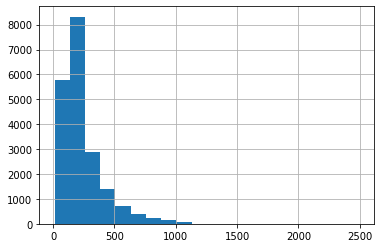

In [68]:
review_lengths.hist(bins=20)
plt.show()

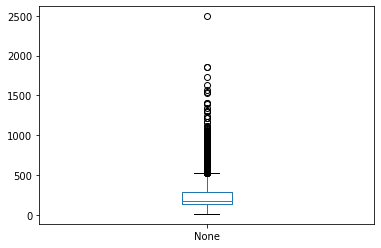

In [69]:
review_lengths.plot.box()
plt.show()

In [71]:
for review in x_train[:5]:
    print(review[:10])

[1, 2, 8, 135, 13, 28, 57, 326, 51, 363]
[1, 2, 2, 2, 18, 116, 9, 4, 2, 2]
[1, 14, 2, 2, 2, 201, 2, 2, 11, 4]
[1, 321, 123, 305, 7, 149, 4, 172, 154, 2]
[1, 2, 2, 2, 270, 11, 4, 2, 2, 7]
